In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style("darkgrid")
import yfinance as yf
plt.style.use("fivethirtyeight")
%matplotlib inline

In [7]:
!pip install pandas_datareader

                                              0.0/109.5 kB ? eta -:--:--
     ----------                            30.7/109.5 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 109.5/109.5 kB 1.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
from pandas_datareader import data as pdr
yf.pdr_override()
from datetime import datetime

In [9]:
company_list = ['ZS','GOOG']
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)
for stock in company_list:
    globals()[stock] = yf.download(stock,start,end)
com_list = [ZS,GOOG]
company_name = ['ZSCALER','GOOGLE']
for company , com_name in zip(com_list,company_name):
    company["company_name"] = com_name
    
df = pd.concat(com_list,axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-11-17,137.820007,138.000000,135.479996,136.940002,136.940002,25565300,GOOGLE
2023-11-20,135.500000,138.425003,135.490005,137.919998,137.919998,19569400,GOOGLE
2023-11-21,137.940002,138.964996,137.705002,138.619995,138.619995,17648100,GOOGLE
2023-11-22,139.100006,141.100006,139.000000,140.020004,140.020004,17306400,GOOGLE
2023-11-24,139.539993,139.677002,137.470001,138.220001,138.220001,8828600,GOOGLE
2023-11-27,137.570007,139.630005,137.539993,138.050003,138.050003,17886400,GOOGLE
2023-11-28,137.630005,138.660004,137.039993,138.619995,138.619995,17046900,GOOGLE
2023-11-29,138.985001,139.669998,136.294998,136.399994,136.399994,21014700,GOOGLE
2023-11-30,136.399994,136.960007,132.789993,133.919998,133.919998,29913500,GOOGLE


In [10]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-12-02,127.290001,132.619995,126.400002,128.990005,128.990005,9665100,ZSCALER
2022-12-05,128.690002,130.979996,119.000000,120.790001,120.790001,4946600,ZSCALER
2022-12-06,121.500000,121.959999,115.349998,115.970001,115.970001,3230700,ZSCALER
2022-12-07,115.970001,117.000000,111.474998,114.239998,114.239998,3162600,ZSCALER
2022-12-08,114.309998,119.610001,112.220001,119.529999,119.529999,2577300,ZSCALER


In [11]:
ZS.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,136.728952,139.600251,134.202319,136.917988,136.917988,2.538245e+06
std,24.994637,25.509541,24.881431,25.195910,25.195910,1.726282e+06
min,86.529999,88.379997,84.930000,87.000000,87.000000,7.205000e+05
25%,114.299999,117.080002,111.537498,113.875000,113.875000,1.568100e+06
50%,139.610001,142.449997,136.820999,139.059998,139.059998,2.087800e+06
75%,155.044998,158.519997,152.200005,155.084999,155.084999,2.904000e+06
max,200.630005,207.781006,196.800003,199.839996,199.839996,1.422530e+07


In [12]:
ZS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-12-02 to 2023-12-01
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


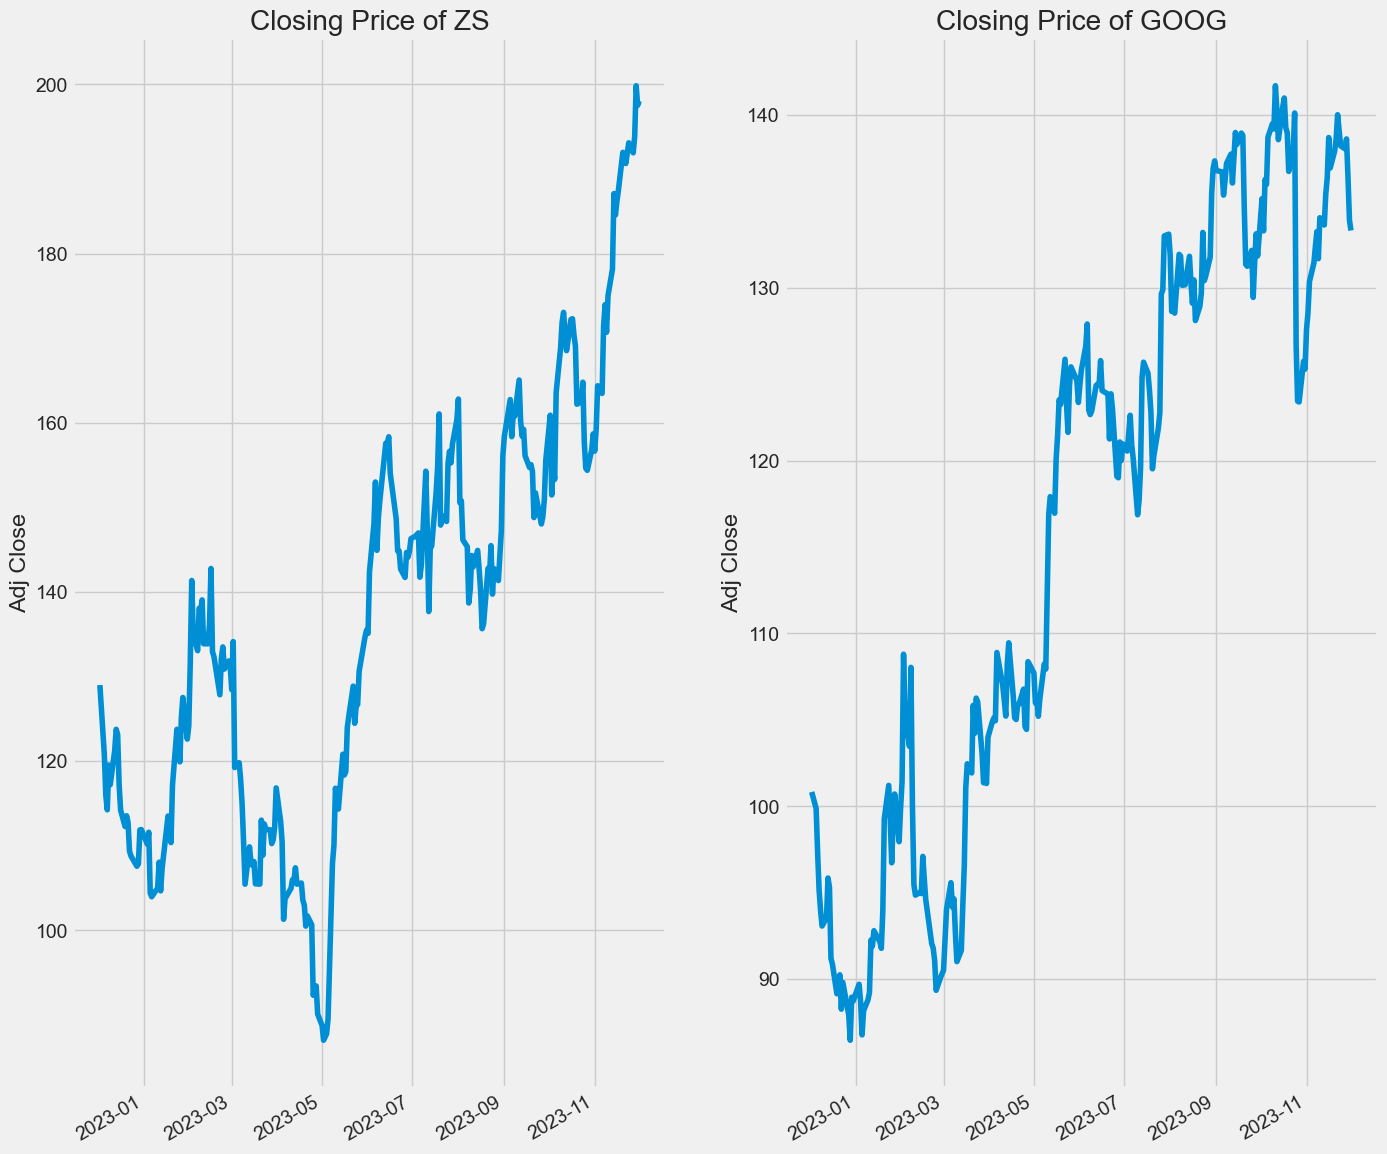

In [16]:
plt.figure(figsize = (15,10))
plt.subplots_adjust(top = 1.25,bottom = 1.2)

for i, company in enumerate(com_list,1):
    plt.subplot(1,2,i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company_list[i - 1]}")

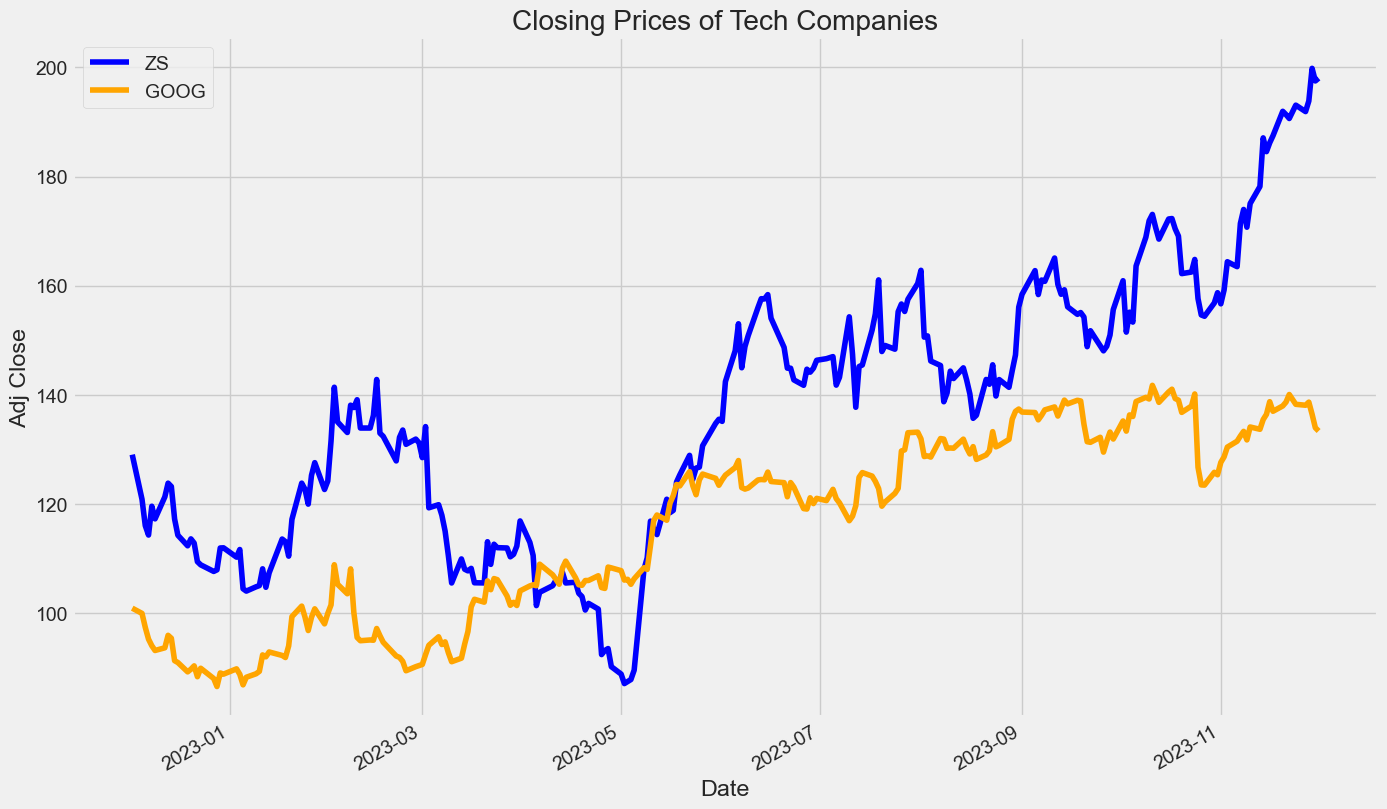

In [18]:
plt.figure(figsize=(15, 10))
colors = ['blue', 'orange']
for i, company in enumerate(com_list):
    company['Adj Close'].plot(label=company_list[i],color= colors[i])

plt.title('Closing Prices of Tech Companies')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.legend()
plt.show()

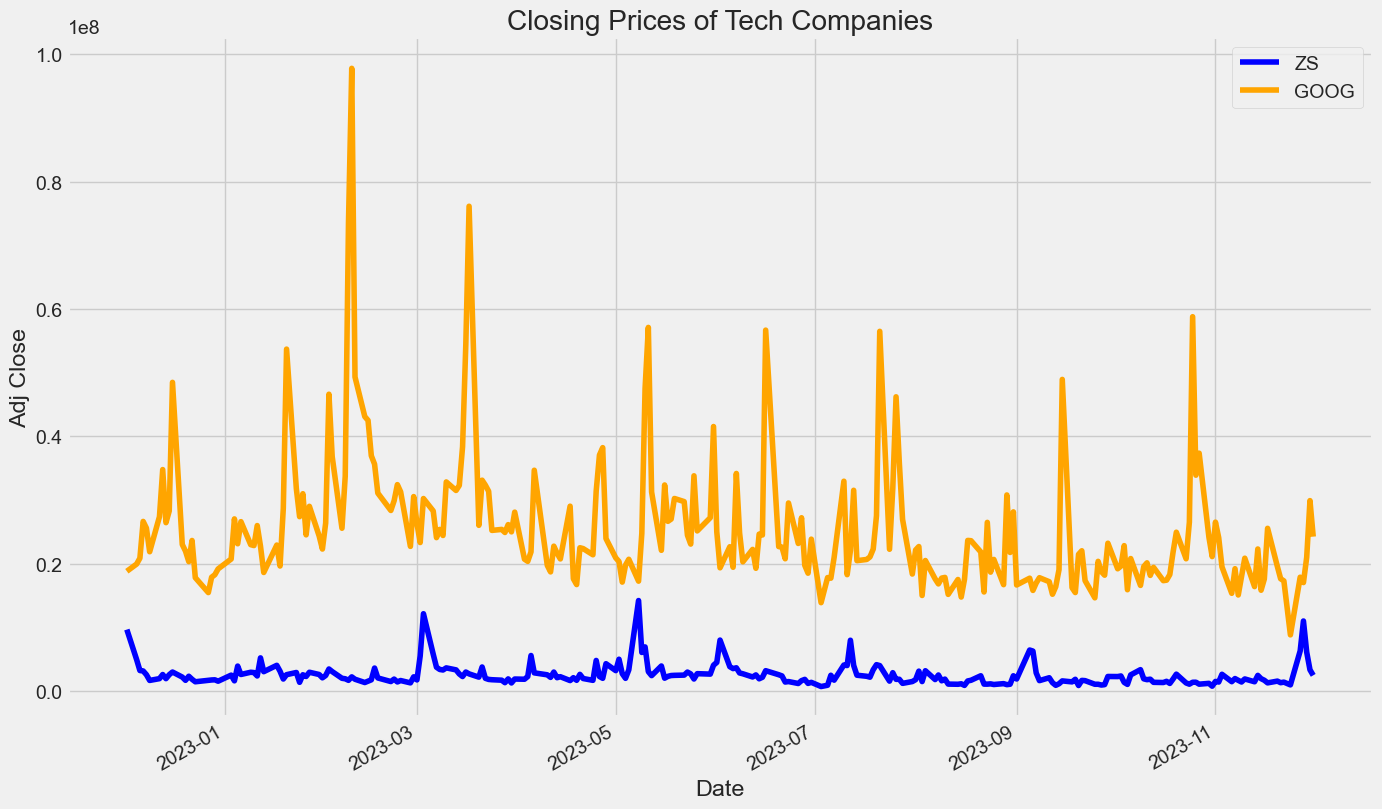

In [19]:
plt.figure(figsize=(15, 10))
colors = ['blue', 'orange']
for i, company in enumerate(com_list):
    company['Volume'].plot(label=company_list[i],color= colors[i])

plt.title('Closing Prices of Tech Companies')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.legend()
plt.show()

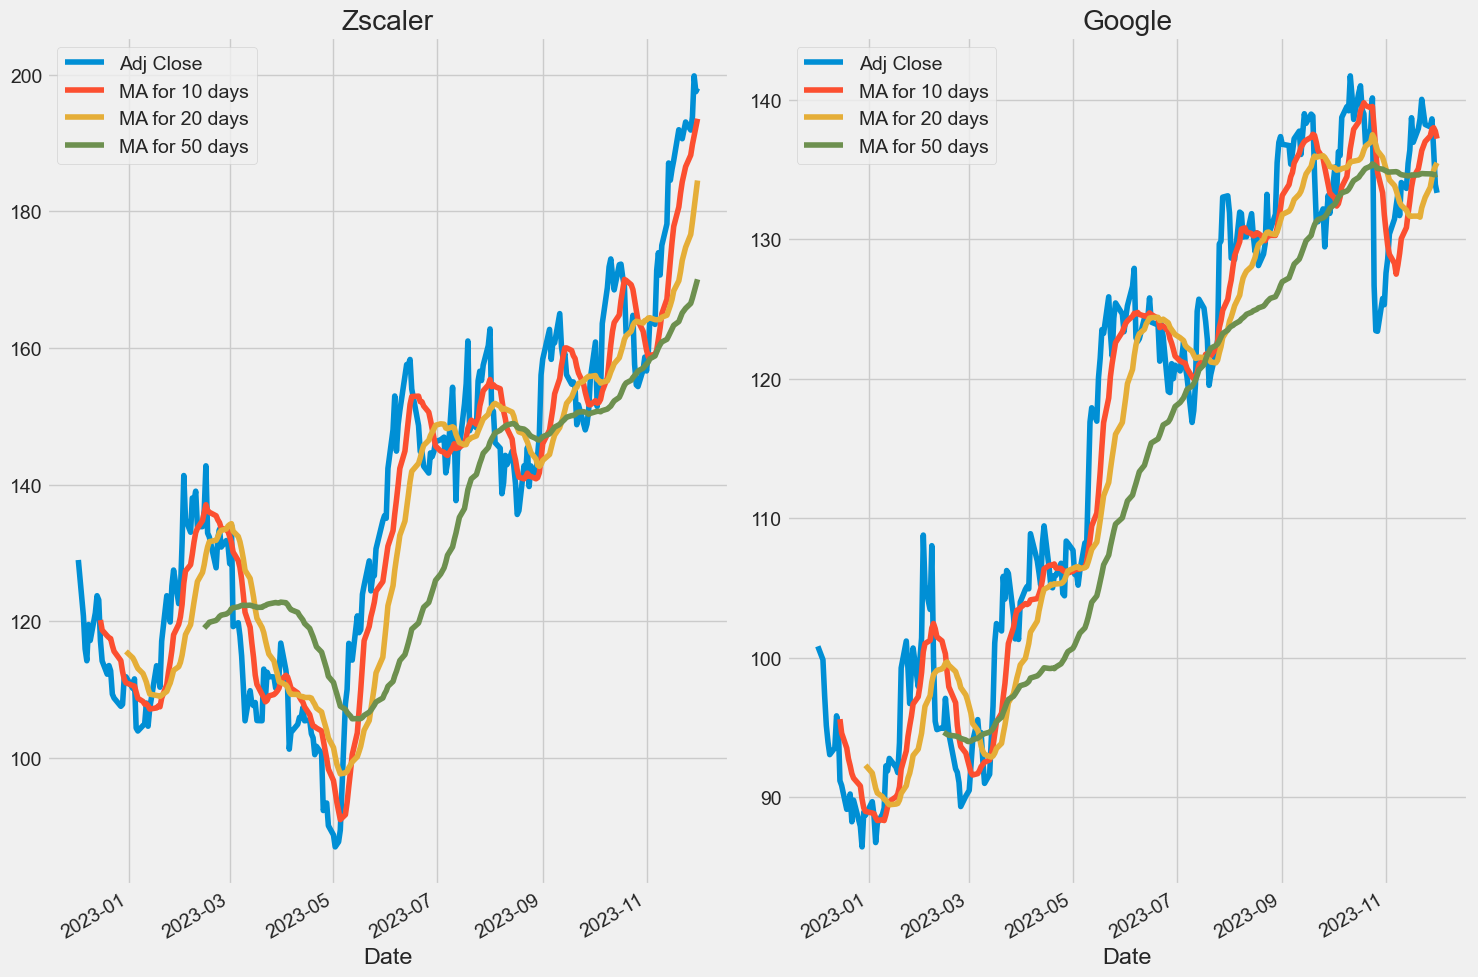

In [23]:
ma_day = [10,20,50]

for ma in ma_day:
    for company in com_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        
fig,axes = plt.subplots(nrows=1,ncols =2)
fig.set_figheight(10)
fig.set_figwidth(15)

ZS[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0])
axes[0].set_title('Zscaler')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1])
axes[1].set_title('Google')

fig.tight_layout()

[*********************100%%**********************]  2 of 2 completed


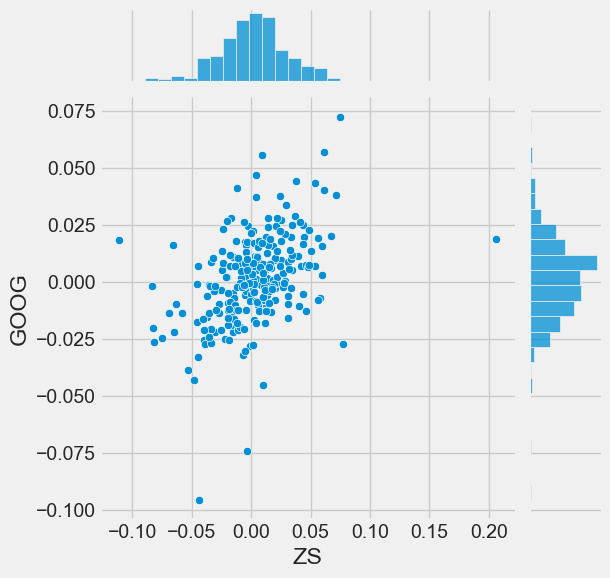

In [25]:
closing_df = pdr.get_data_yahoo(company_list, start=start, end=end)['Adj Close']

tech_rets = closing_df.pct_change()
sns.jointplot(x='ZS', y='GOOG', data=tech_rets, kind='scatter')

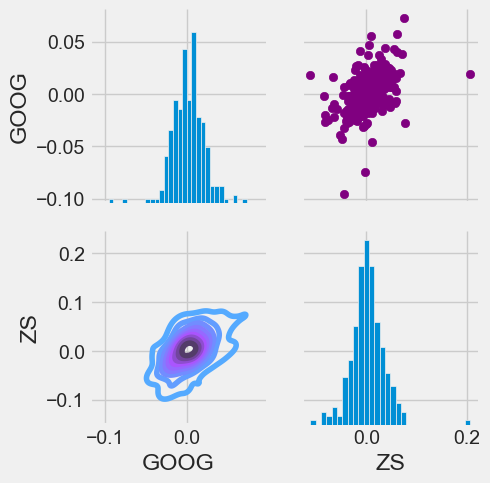

In [26]:
return_fig = sns.PairGrid(tech_rets.dropna())

return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(plt.hist, bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

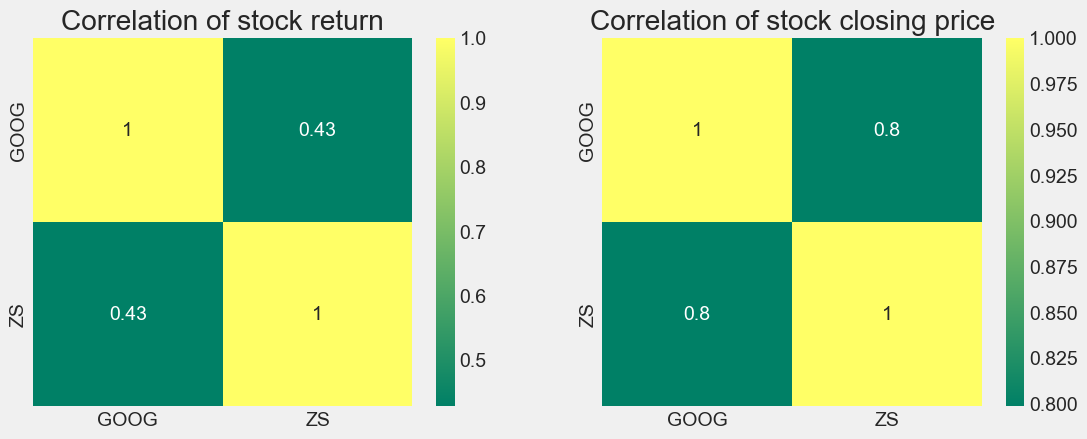

In [27]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

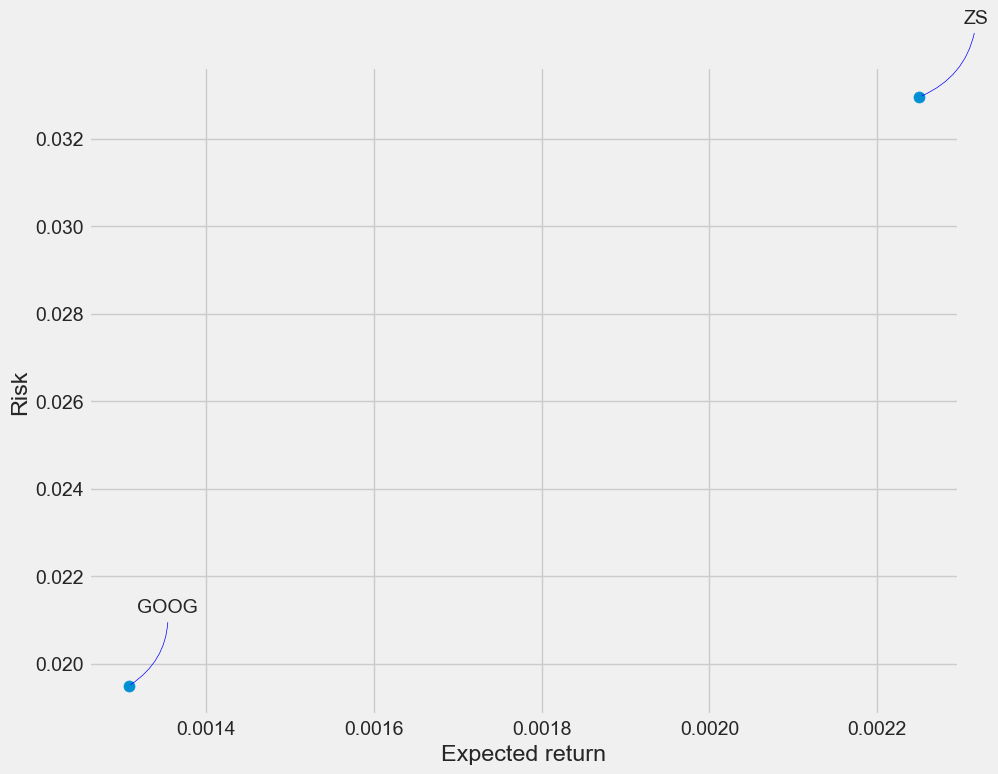

In [29]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [30]:
df = pdr.get_data_yahoo('ZS', start='2012-01-01', end=datetime.now())

df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-03-16,27.500000,33.470001,26.059999,33.000000,33.000000,16931900
2018-03-19,31.450001,31.500000,26.750000,27.900000,27.900000,5892100
2018-03-20,28.410000,30.903999,28.070000,30.379999,30.379999,3262000
2018-03-21,30.790001,34.830002,29.290001,31.080000,31.080000,4460900
2018-03-22,30.000000,31.879999,28.559999,29.830000,29.830000,3239500
...,...,...,...,...,...,...
2023-11-27,191.990005,195.070007,190.429993,191.910004,191.910004,6317800
2023-11-28,183.750000,194.110001,182.600006,193.850006,193.850006,11013400
2023-11-29,197.270004,207.781006,196.800003,199.839996,199.839996,6120300


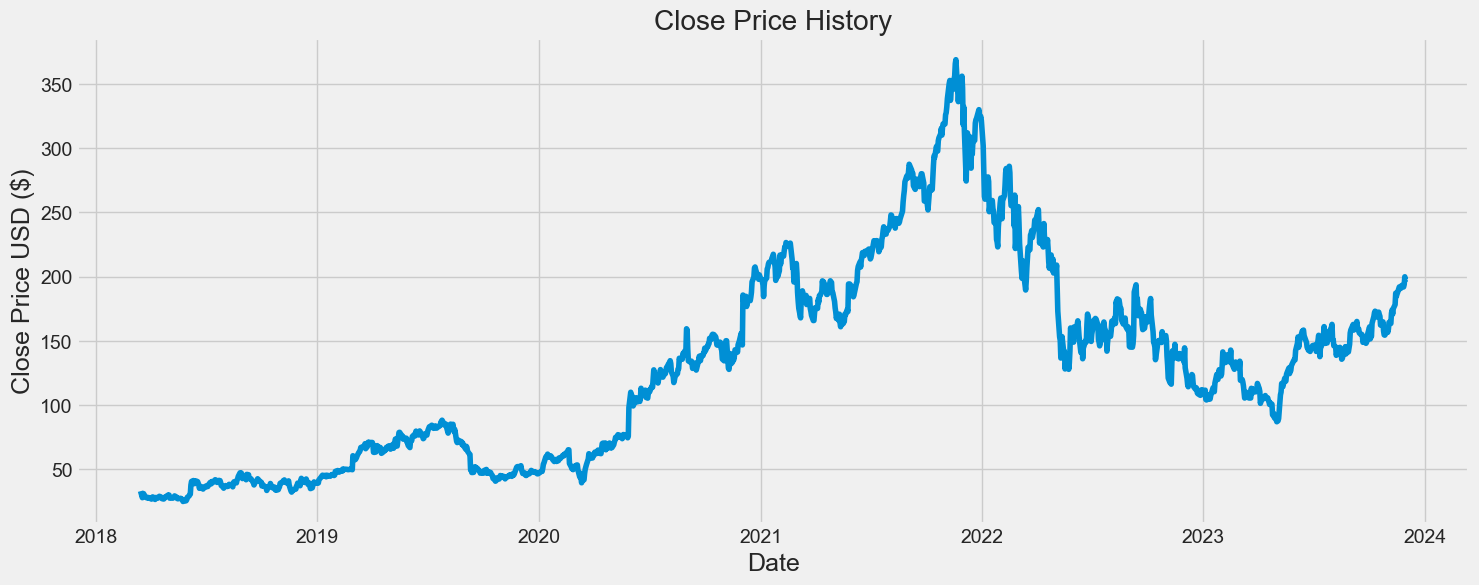

In [31]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [33]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

1368

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

In [35]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.02341273, 0.00857982, 0.01579268, 0.01782858, 0.01419306,
       0.01302969, 0.00837623, 0.00814356, 0.00750371, 0.00907425,
       0.00613675, 0.00538056, 0.00878341, 0.01041212, 0.00951051,
       0.00462438, 0.00907425, 0.00802722, 0.00875432, 0.00735828,
       0.01174999, 0.01105197, 0.01076113, 0.00895792, 0.0066021 ,
       0.00555507, 0.00636942, 0.00919059, 0.01076113, 0.01093563,
       0.01436756, 0.01215717, 0.01454207, 0.00762004, 0.00846348,
       0.00785271, 0.00750371, 0.0084344 , 0.00939418, 0.01270977,
       0.01023761, 0.0071547 , 0.006224  , 0.00709653, 0.0067766 ,
       0.00718378, 0.006224  , 0.00468254, 0.00465346, 0.        ,
       0.00197772, 0.00159963, 0.00381002, 0.00939418, 0.01238984,
       0.01506558, 0.01657796, 0.03734404, 0.04531309, 0.04740715])]
[0.040659627207894886]

[array([0.02341273, 0.00857982, 0.01579268, 0.01782858, 0.01419306,
       0.01302969, 0.00837623, 0.00814356, 0.00750371, 0.00907425,
       0.00613675, 0.00538056, 0.0

In [39]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [42]:
model = Sequential()
model.add(LSTM(128,return_sequences=True,input_shape = (x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train,batch_size=1,epochs=1)

1308/1308 [==============================] - 85s 59ms/step - loss: 0.0023


In [43]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

3/3 [==============================] - 2s 55ms/step


9.782500775165401

C:\Users\admin\AppData\Local\Temp\ipykernel_8560\118932066.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


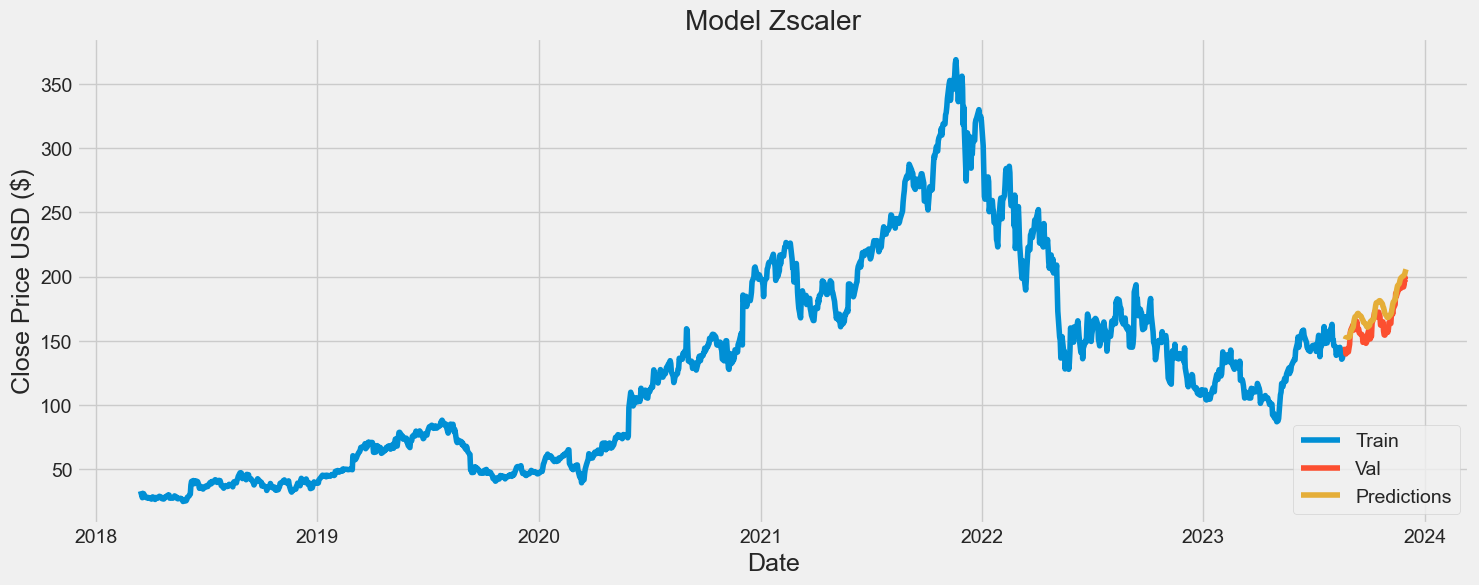

In [45]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model Zscaler')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()